# Final Neighborhood Rankings


This notebook ranks the neighborhoods by how many public art installations it has


**Importing**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Art Data
data1 = pd.read_csv('publicArtData.csv', sep=',')
artCount = data1.groupby('neighborhood')['id'].count()
artCount = artCount.sort_values()  # <- fixed this line

# Trees Data
data2 = pd.read_csv('treesData.csv', sep=',', dtype={data2.columns[2]: str})
treesCount = data2.groupby('neighborhood')['_id'].count()
treesCount = treesCount.sort_values()

# Trash Data
data3 = pd.read_csv('trashData.csv', sep=',')
trashCount = data3.groupby('neighborhood')['container_id'].count()
trashCount = trashCount.sort_values()


**Art Plot**

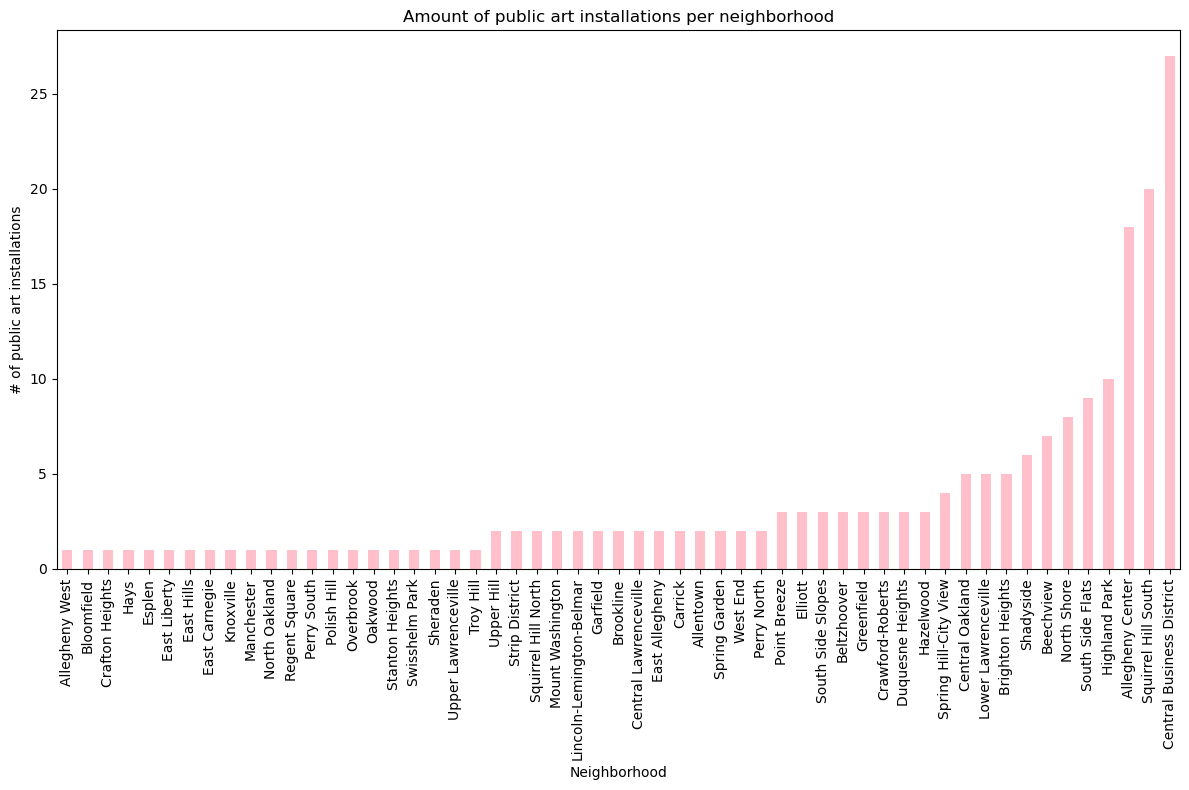

In [27]:
plt.figure(figsize=(12, 8))
artCount.sort_values().plot(kind='bar', color='pink')
plt.title('Amount of public art installations per neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('# of public art installations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Trees Plot**

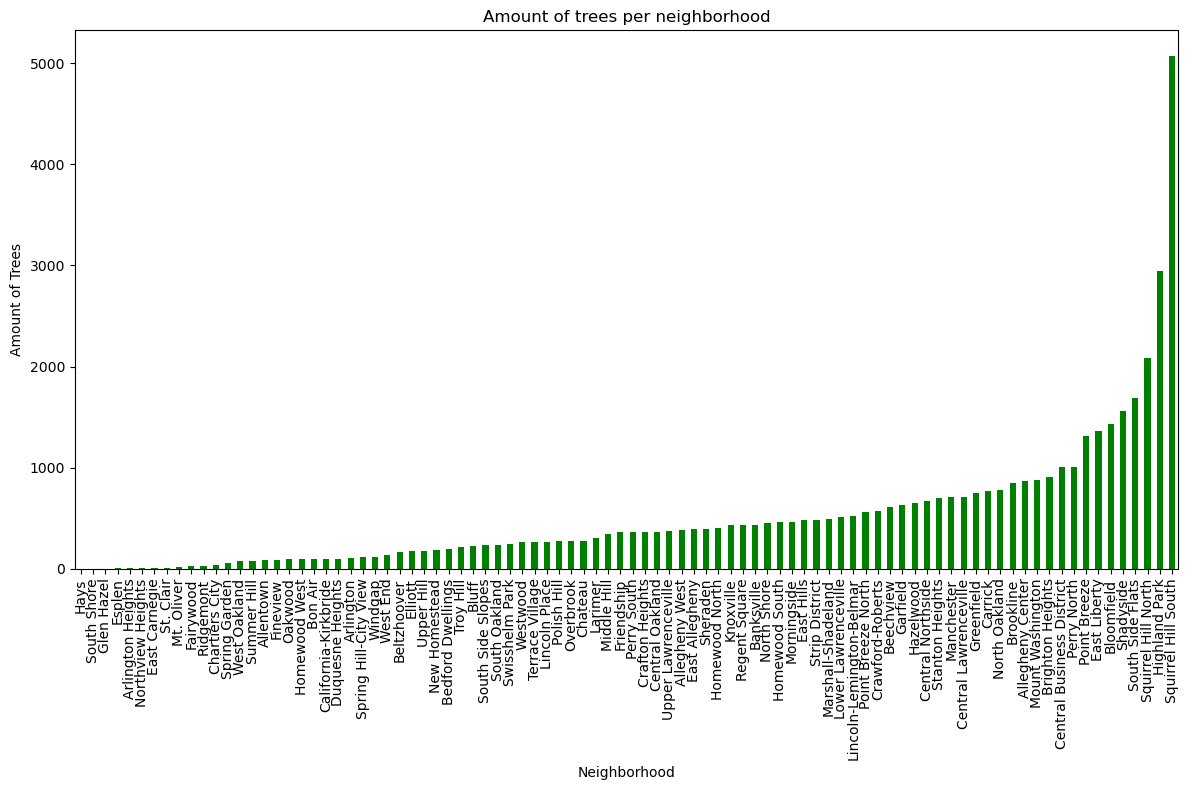

In [28]:
plt.figure(figsize=(12, 8))
treesCount.sort_values().plot(kind='bar', color='green')
plt.title('Amount of trees per neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Amount of Trees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Trash Plot**

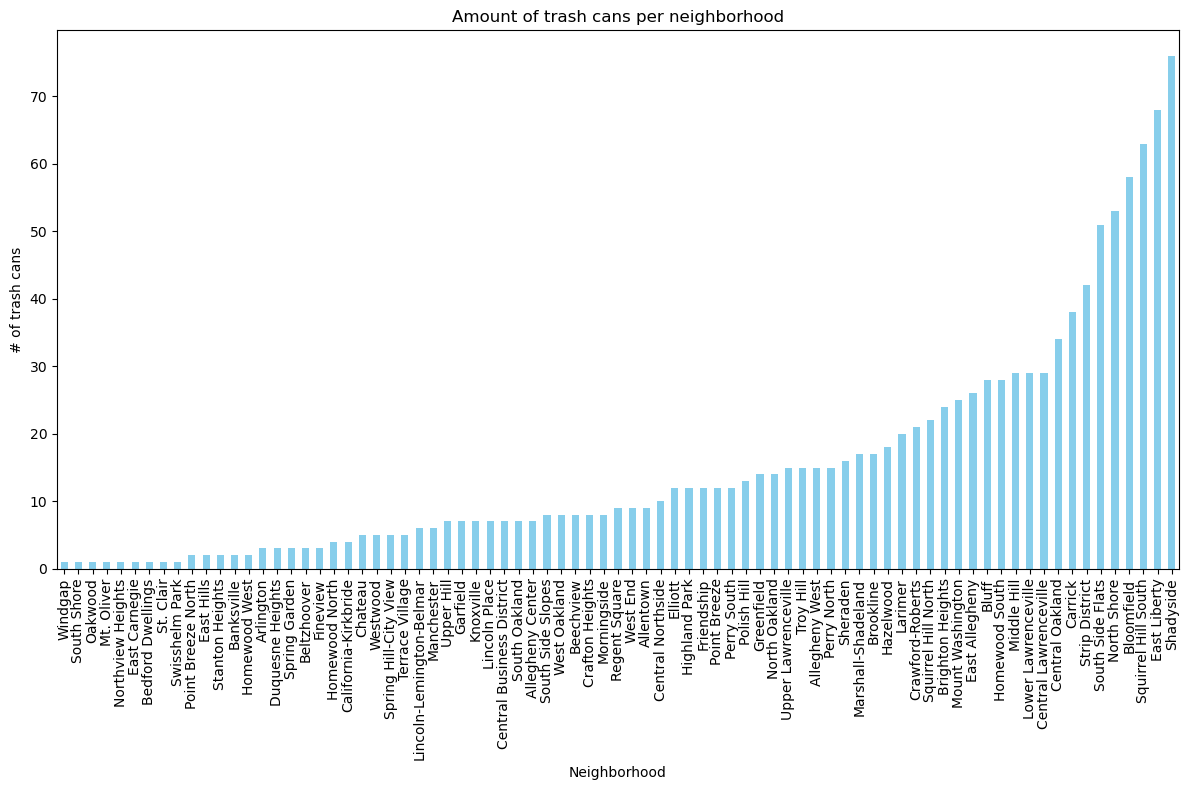

In [29]:
plt.figure(figsize=(12, 8))
trashCount.sort_values().plot(kind='bar', color='skyblue')
plt.title('Amount of trash cans per neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('# of trash cans')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
# rank metrics
artRank = artCount.rank(ascending=False, method='min')
treesRank = treesCount.rank(ascending=False, method='min')
trashRank = trashCount.rank(ascending=False, method='min')

#combine ranking
rankings = pd.DataFrame({
    'art_rank': artRank,
    'trees_rank': treesRank,
    'trash_rank': trashRank
})

rankings['average_rank'] = rankings.mean(axis=1)
rankings = rankings.round(2)
rankings = rankings.sort_values('average_rank')
rankings.reset_index(inplace=True)

# Show top 10 
print(rankings.head(10))

          neighborhood  art_rank  trees_rank  trash_rank  average_rank
0  Squirrel Hill South       2.0         1.0         3.0          2.00
1            Shadyside       8.0         5.0         1.0          4.67
2     South Side Flats       5.0         4.0         6.0          5.00
3     Brighton Heights       9.0        11.0        17.0         12.33
4        Highland Park       4.0         2.0        32.0         12.67
5  Squirrel Hill North      21.0         3.0        18.0         14.00
6         East Liberty      35.0         7.0         2.0         14.67
7          North Shore       6.0        34.0         5.0         15.00
8           Bloomfield      35.0         6.0         4.0         15.00
9              Carrick      21.0        16.0         8.0         15.00


In [42]:
from IPython.display import Image, display

for i in range(10):
    print(rankings[i])
    display(Image(filename="rank" + str(i) + ".jpg"))

KeyError: 0